In [2]:
import pandas as pd
import numpy as np
import tsplib95
from tqdm import trange

from map import Map
from anneal import SimAnneal
# from main import get_data, create_map

import matplotlib.pyplot as plt
%matplotlib inline

# Check for best

In [6]:
SA = SimAnneal(type="a280",
               T0=10,
               sched=1,
               chain_length=500,
               method=4)
output_df = SA.run(Nmax=int(10000))

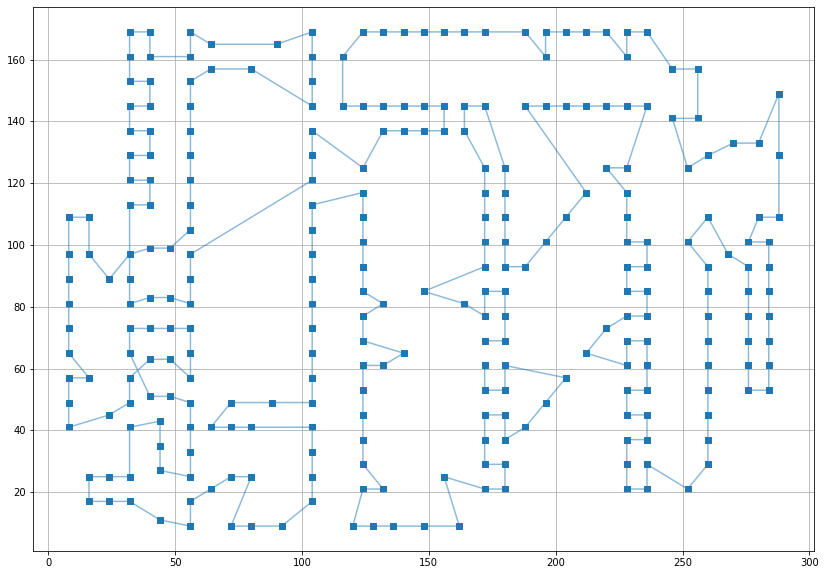

Tour length:  2814.0


No Error

In [7]:
SA.Map

# Check for multiple Swapping methods

1 => 1 node

2 => 2 nodes

3 => N sequential nodes

4 => Combined


In [ ]:
# Different methods
methods = [1, 2, 3, 4]

best_method = {'param': None,
                'route': None,
                'score': np.inf}
all_means = []
for i in trange(30):
    means = []
    for method in methods:
        SA = SimAnneal(type="a280",
                        T0=10,
                        sched=1,
                        chain_length=50,
                        method=method)
        output_df = SA.run(Nmax=int(10000))
        new_score = SA.Map.calculate_tour_length(SA.Map.make_edges_of_tour(SA.Map.nodes))
        if new_score < best['score']:
            best_method['param'] = SA
            best_method['route'] = SA.Map.nodes
            best_method['score'] = new_score
        means.append(np.mean(output_df['Distances']))
    all_means.append(means)
_ = pd.DataFrame(all_means, columns=[f"Method={i}" for i in methods])
_.to_csv('Methods.csv', index=False)
_

# Check for T0s
T0 = []

In [ ]:
# Different methods
T0s = [1, 2, 3, 4]

best_T0 = {'param': None,
           'route': None,
           'score': np.inf}
all_means = []
for i in trange(30):
    means = []
    for T0 in T0s:
        SA = SimAnneal(type="a280",
                        T0=T0,
                        sched=1,
                        chain_length=50,
                        method=4)
        output_df = SA.run(Nmax=int(10000))
        new_score = SA.Map.calculate_tour_length(SA.Map.make_edges_of_tour(SA.Map.nodes))
        if new_score < best_T0['score']:
            best_T0['param'] = SA
            best_T0['route'] = SA.Map.nodes
            best_T0['score'] = new_score
        means.append(np.mean(output_df['Distances']))
    all_means.append(means)
_ = pd.DataFrame(all_means, columns=[f"T0={i}" for i in T0s])
_.to_csv('T0s.csv', index=False)

# Check for chain length

In [ ]:
# Different ChainLenghts
ChainLengths = [1, 50, 100, 200, 500]

best_chain = {'param': None,
            'route': None,
            'score': np.inf}
all_means = []
for i in trange(30):
    means = []
    for chain in ChainLengths:
        SA = SimAnneal(type="a280",
                        T0=10,
                        sched=1,
                        chain_length=chain,
                        method=4)
        output_df = SA.run(Nmax=int(10000))
        new_score = SA.Map.calculate_tour_length(SA.Map.make_edges_of_tour(SA.Map.nodes))
        if new_score < best_chain['score']:
            best_chain['param'] = SA
            best_chain['route'] = SA.Map.nodes
            best_chain['score'] = new_score
        means.append(np.mean(output_df['Distances']))
    all_means.append(means)
_ = pd.DataFrame(all_means, columns=[f"ChainLength={i}" for i in ChainLengths])
_.to_csv('ChainLenghts.csv', index=False)

# Check for cooling schedules

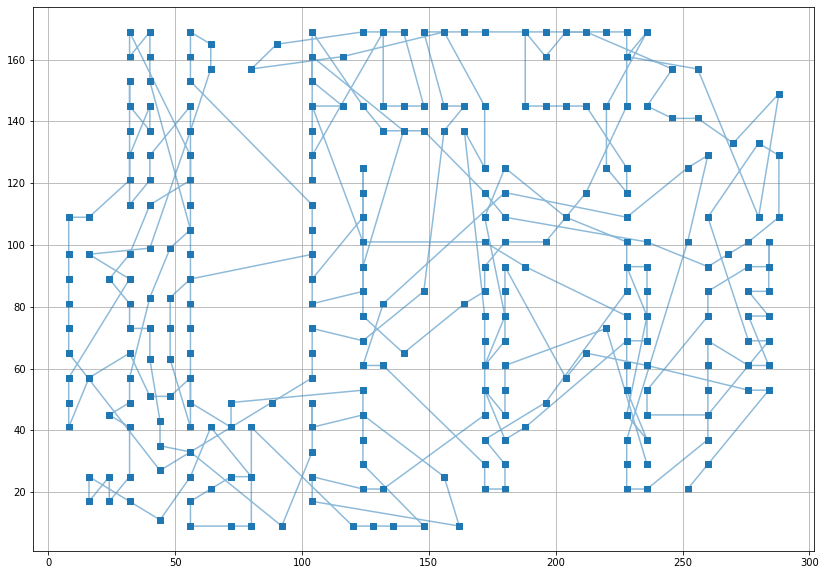

Tour length:  5499.0


No Error

In [14]:
# Different cooling schedules
CoolingSchedules = [1, 2]

best_schedule = {'param': None,
            'route': None,
            'score': np.inf}
all_means = []
for i in trange(30):
    means = []
    for schedule in CoolingSchedules:
        SA = SimAnneal(type="a280",
                        T0=10,
                        sched=schedule,
                        chain_length=50,
                        method=4)
        output_df = SA.run(Nmax=int(10000))
        new_score = SA.Map.calculate_tour_length(SA.Map.make_edges_of_tour(SA.Map.nodes))
        if new_score < best_schedule['score']:
            best_schedule['param'] = SA
            best_schedule['route'] = SA.Map.nodes
            best_schedule['score'] = new_score
        means.append(np.mean(output_df['Distances']))
    all_means.append(means)
_ = pd.DataFrame(all_means, columns=[f"Schedule={i}" for i in schedule])
_.to_csv('Schedules.csv', index=False)